# ME314 Homework 3

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

https://www.khoury.northeastern.edu/home/lieber/courses/algorithms/cs4800/f10/lectures/11.4.Maximizing.pdf
Cite this

In [37]:
#IMPORT CELL
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt


In [38]:
##############################################################################################
# If you're using Google Colab, uncomment this section by selecting the whole section and press
# ctrl+'/' on your and keyboard. Run it before you start programming, this will enable the nice
# LaTeX "display()" function for you. If you're using the local Jupyter environment, leave it alone
##############################################################################################

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

Below are the help functions in previous homeworks, which you may need for this homework.

In [39]:

def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj

def animate_double_pend(theta_array,L1=1,L2=1,T=10):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation

    ####################################
    # Using these to specify axis limits.
    xm=np.min(xx1)-0.5
    xM=np.max(xx1)+0.5
    ym=np.min(yy1)-2.5
    yM=np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[dict(x=xx1, y=yy1,
               mode='lines', name='Arm',
               line=dict(width=2, color='blue')
              ),
          dict(x=xx1, y=yy1,
               mode='lines', name='Mass 1',
               line=dict(width=2, color='purple')
              ),
          dict(x=xx2, y=yy2,
               mode='lines', name='Mass 2',
               line=dict(width=2, color='green')
              ),
          dict(x=xx1, y=yy1,
               mode='markers', name='Pendulum 1 Traj',
               marker=dict(color="purple", size=2)
              ),
          dict(x=xx2, y=yy2,
               mode='markers', name='Pendulum 2 Traj',
               marker=dict(color="green", size=2)
              ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation',
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[dict(x=[0,xx1[k],xx2[k]],
                            y=[0,yy1[k],yy2[k]],
                            mode='lines',
                            line=dict(color='red', width=3)
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       go.Scatter(
                            x=[xx2[k]],
                            y=[yy2[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)
    iplot(figure1)

## Problem 1 (10pts)

Let $f:\mathbb{R}^2\to\mathbb{R}$ with $f(x,y)=\sin(x+y)\sin(x-y)$.  Show that $(x,y)=(0,\pi/2)$ satisfies both the necessary and sufficient conditions to be a local minimizer of $f$.

> *Hint 1: You will need to take the first and second order derivative of $f$ with respect to $[x,y]$.*

---
**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use $\LaTeX$. If you use SymPy, include a copy of your code and all the outputs. Regardless of the format you choose, explain why your result satisfies the necessary and sufficient conditions.**

In [40]:
# setting up useful symbols
x, y = sym.symbols('x, y')
q = sym.Matrix([x, y])

# defining f(x,y)
Fxy = sym.Matrix([sym.sin(x + y)*sym.sin(x - y)])

# taking first derivative
Fxydot = Fxy.jacobian(q)

# taking second derivative
Fxyddot = Fxydot.jacobian(q)

# substituting the values of x,y
dot_val = Fxydot.subs({x: 0, y:np.pi/2})
print("\n\033[1mFirst derivative value at (0,pi/2): ")
display(dot_val)

ddot_val = Fxyddot.subs({x: 0, y:np.pi/2})
print("\n\033[1mSecond derivative value at (0,pi/2): ")
display(ddot_val)

# df/dx is zero and df/dy is a very small value, which can be assumed as zero

# Calculate determinant of second derivative matrix
print("\n\033[1mDeterminant of second derivative matrix: ")
display(ddot_val.det())

# This proves (x,y) = (0,pi/2) is a local minimizer of f


First derivative value at (0,pi/2): 


[0  -1.22464679914735e-16]


Second derivative value at (0,pi/2): 


⎡2.0   0 ⎤
⎢        ⎥
⎣ 0   2.0⎦


Determinant of second derivative matrix: 


4.00000000000000

**Explanation**: If first_derivative of f(x,y) is zero, that means given (x,y) is a critical point. If determinant of matrix of the second derivative is positive, that means the given point is a minimizer of the function! Both these conditions are satisfied for our case, which means $(x,y) = (0, \pi/2)$ is a local minimizer of $f(x,y)$

## Problem 2 (20pts)

In [41]:
#@title
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/twolinearmasses.png' width=500' height='350'></table>"))

Compute the equations of motion for the two-mass-spring system (shown above) in $\theta=(\theta_1,\theta_2)$ coordinates. The first sphere with mass $m_1$ is the one close to the wall, and the second sphere has mass $m_2$. Assume that there is a spring of spring constant $k_1$ between the first mass and the wall and a spring of spring constant $k_2$ between the first mass and the second mass. The natural length of each spring is zero.

---
**Turn in: Include the code used to symbolically solve for the equations of motion and the code output, which should be the equations of motion. Make sure you are using *SimPy*'s `.simplify()` functionality when printing your output.**

In [42]:
# Defining useful symbols
m1,m2,L,t = sym.symbols('m_1, m_2, L, t')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
k1, k2 = sym.symbols(r'k_1, k_2')

q = sym.Matrix([th1, th2])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Representing the positions and velocities of the masses in angular coordinates
mass_coordinates = sym.Matrix([L * sym.tan(th1), (L*sym.tan(th1 + th2)) - (L*sym.tan(th1))])
mass_velocities = mass_coordinates.diff(t)

# Kinetic energy of the system
KE = (0.5 * m1 * mass_velocities[0]**2) + (0.5 * m2 * (mass_velocities[0] + mass_velocities[1])**2)

# Potential energy of the system
PE = (0.5 * k1 * mass_coordinates[0]**2) + (0.5 * k2 * mass_coordinates[1]**2)

# Lagrangian of the system
L = sym.Matrix([KE - PE])

# First term of Euler Lagrange expression
dLdq = L.jacobian(q)

# Second term of Euler Lagrange expression
dLdqdot = L.jacobian(qdot)
dLdqdot_dot = dLdqdot.diff(t)

# Euler Lagrange expression
EL = dLdq - dLdqdot_dot

# Converting EL expression to equation form
rhs = sym.Matrix([0, 0])
EL_eqn = sym.Eq(EL.T, rhs)


soln = sym.solve(EL_eqn, qddot, dict= True)
# printing the expressions for accelerations
for sol in soln:
  print("\n\033[1mAccelerations: ")
  for v in qddot:
    display(sym.Eq(v, sol[v]))


# # Lambdifying the expressions
# th1_val = sym.lambdify([m1, m2,  th1, th2, k1, k2, qdot[0], qdot[1]], sol[qddot[0]])
# th2_val = sym.lambdify([m1, m2, th1, th2, k1, k2, qdot[0], qdot[1]], sol[qddot[1]])



Accelerations: 


                                                                                                   ↪
                                                                                                   ↪
 2                                                                                                 ↪
d                      k₁⋅tan(\theta₁(t))      k₂⋅tan(\theta₁(t) + \theta₂(t))      k₂⋅tan(\theta₁ ↪
───(\theta₁(t)) = - ──────────────────────── + ─────────────────────────────── - ───────────────── ↪
  2                       2                             2                              2           ↪
dt                  m₁⋅tan (\theta₁(t)) + m₁      m₁⋅tan (\theta₁(t)) + m₁       m₁⋅tan (\theta₁(t ↪

↪                                                   2                                          2
↪                     3             ⎛d             ⎞                           ⎛d             ⎞ 
↪           2.0⋅m₁⋅tan (\theta₁(t))⋅⎜──(\theta₁(t))⎟    2.0⋅m₁⋅tan(\theta₁(t))⋅⎜──(\theta₁(t))⎟ 
↪

                                                                                                   ↪
                                                                                                   ↪
 2                                                             2                                   ↪
d                                                     k₁⋅m₂⋅tan (\theta₁(t) + \theta₂(t))⋅tan(\the ↪
───(\theta₂(t)) = ──────────────────────────────────────────────────────────────────────────────── ↪
  2                        2                             2                        2                ↪
dt                m₁⋅m₂⋅tan (\theta₁(t) + \theta₂(t))⋅tan (\theta₁(t)) + m₁⋅m₂⋅tan (\theta₁(t) + \ ↪

↪                                                                                                  ↪
↪                                                                                                  ↪
↪                                                                                         

## Problem 3 (10pts)

For the same two-spring-mass system in Problem 2, show by example that Newton's equations do not hold in an arbitrary choice of coordinates (but they do, of course, hold in Cartesian coordinates). Your example should be implemented using Python's SymPy package.

> *Hint 1: In other words, you need to find a set of coordinates $q=[q_1,q_2]$, and compute the equations of motion ($F=ma=m\ddot{q}$), showing that these equations of motion do not make the same prediction as Newton's laws in the Cartesian inertially fixed frame (where they are correct).*
>
> *Hint 2: Newton's equations don't hold in non-inertia coordinates. For the $x_1,x_2$ and $y_1,y_2$ coordinates shown in the image, one of them is non-inertia coordinate.*

---
**Turn in: Include the code you used to symbolically compute the equations of motion to show that Newton's equations don't hold. Also, include the output of the code, which should be the equations of motion under the chosen set of coordinates. Make sure toindicate what coordinate you choose in the comments.**

In [43]:
# Defining useful symbols
m1,m2,L,t = sym.symbols('m_1, m_2, L, t')
x1 = sym.Function('x_1')(t)
x2 = sym.Function('x_2')(t)
y1 = sym.Function('y_1')(t)
y2 = sym.Function('y_2')(t)
k1, k2 = sym.symbols(r'k_1, k_2')

q = sym.Matrix([x1, x2])
qdot = q.diff(t)
qddot = qdot.diff(t)

w = sym.Matrix([y1, y2])
wdot = w.diff(t)
wddot = wdot.diff(t)

# Kinetic energy of the system
KE = (0.5 * m1 * qdot[0]**2) + (0.5 * m2 * (qdot[0] + qdot[1])**2)

# Potential energy of the system
PE = (0.5 * k1 * q[0]**2) + (0.5 * k2 * q[1]**2)

# Lagrangian of the system
L = sym.Matrix([KE - PE])

# First term of Euler Lagrange expression
dLdq = L.jacobian(q)

# Second term of Euler Lagrange expression
dLdqdot = L.jacobian(qdot)
dLdqdot_dot = dLdqdot.diff(t)

# Euler Lagrange expression
EL = dLdq - dLdqdot_dot

# Converting EL expression to equation form
rhs = sym.Matrix([0, 0])
EL_eqn = sym.Eq(EL.T, rhs)
display(EL_eqn)

soln = sym.solve(EL_eqn, qddot, dict= True)
# printing the expressions for accelerations
for sol in soln:
  print("\n\033[1mAccelerations: ")
  for v in qddot:
    display(sym.Eq(v, sol[v]))

# Newton's Laws in x1,x2 coordinates
print("\n\033[1mEquations from Newton's Laws in x1, x2 coordinates: ")
display(sym.Eq(qddot[0], k2*x2/m1 - k1*x1/m1))
display(sym.Eq(qddot[1], k2*x2/m2 - k2*x2/m1 + k1*x1/m1))

# Newton's Laws in y1, y2 coordinates
print("\n\033[1mEquations from Newton's Laws in y1, y2 coordinates: ")
display(sym.Eq(wddot[0], k2*y2/m1- k2*y1/m1 - k1*y1/m1))
display(sym.Eq(wddot[1], k2*y2/m2 - k2*y1/m2))

# On comparison, we find that Newton's equations in x1, x2 coordinates, are not the same as that calculated by the Euler Lagrange equations
# But the Newton's equations in y1, y2 coordinates can be modified and shown to be equivalent to the calculated Euler Lagrange equations


⎡                        2                  ⎛   2              2        ⎞⎤      
⎢                       d                   ⎜  d              d         ⎟⎥      
⎢-1.0⋅k₁⋅x₁(t) - 1.0⋅m₁⋅───(x₁(t)) - 0.5⋅m₂⋅⎜2⋅───(x₁(t)) + 2⋅───(x₂(t))⎟⎥      
⎢                         2                 ⎜    2              2       ⎟⎥      
⎢                       dt                  ⎝  dt             dt        ⎠⎥   ⎡0⎤
⎢                                                                        ⎥ = ⎢ ⎥
⎢                                 ⎛   2              2        ⎞          ⎥   ⎣0⎦
⎢                                 ⎜  d              d         ⎟          ⎥      
⎢          -1.0⋅k₂⋅x₂(t) - 0.5⋅m₂⋅⎜2⋅───(x₁(t)) + 2⋅───(x₂(t))⎟          ⎥      
⎢                                 ⎜    2              2       ⎟          ⎥      
⎣                                 ⎝  dt             dt        ⎠          ⎦      


Accelerations: 


 2                                
d              k₁⋅x₁(t)   k₂⋅x₂(t)
───(x₁(t)) = - ──────── + ────────
  2               m₁         m₁   
dt                                

 2                                         
d            k₁⋅x₁(t)   k₂⋅x₂(t)   k₂⋅x₂(t)
───(x₂(t)) = ──────── - ──────── - ────────
  2             m₁         m₂         m₁   
dt                                         


Equations from Newton's Laws in x1, x2 coordinates: 


 2                                
d              k₁⋅x₁(t)   k₂⋅x₂(t)
───(x₁(t)) = - ──────── + ────────
  2               m₁         m₁   
dt                                

 2                                         
d            k₁⋅x₁(t)   k₂⋅x₂(t)   k₂⋅x₂(t)
───(x₂(t)) = ──────── + ──────── - ────────
  2             m₁         m₂         m₁   
dt                                         


Equations from Newton's Laws in y1, y2 coordinates: 


 2                                           
d              k₁⋅y₁(t)   k₂⋅y₁(t)   k₂⋅y₂(t)
───(y₁(t)) = - ──────── - ──────── + ────────
  2               m₁         m₁         m₁   
dt                                           

 2                                
d              k₂⋅y₁(t)   k₂⋅y₂(t)
───(y₂(t)) = - ──────── + ────────
  2               m₂         m₂   
dt                                


## Problem 4 (10pts)

In [44]:
#@title
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/dyndoublepend.png' width=500' height='350'></table>"))



For the same double-pendulum system hanging in gravity in Homework 2 (shown above), take $q=[\theta_1, \theta_2]$ as the system configuration variables, with $R_1=R_2=1, m_1=m_2=1$. Symbolically compute the Hamiltonian of this system using Python's *SymPy* package.

---
**Turn in: Include the code used to symbolically compute the Hamiltonian of the system and the code output, which should the Hamiltonian of the system. Make sure you are using *SimPy*'s `.simplify()` functionality when printing your output.**

In [45]:
t, g, m1, m2, R1, R2 = sym.symbols(r't, g, m_1, m_2, R_1, R_2')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
q = sym.Matrix([th1, th2])
qdot = q.diff(t)
qddot = qdot.diff(t)
# display(qddot)
# Kinetic energy of mass m1
KE_m1 = 0.5*m1*R1**2*qdot[0]**2
# display(KE_m1)
# Potential energy of mass m1
PE_m1 = -1 * m1*g*R1*sym.cos(q[0])
# display(PE_m1)
# Kinetic energy of mass m2
KE_m2 = 0.5*m2*((R1*qdot[0])**2 + (R2*(qdot[0] + qdot[1]))**2 + (2*R1*R2*qdot[0]*(qdot[0]+qdot[1])*sym.cos(q[1])))
# display(KE_m2)
# Potential energy of mass m2
PE_m2 = -1 * m2*g*((R1*sym.cos(q[0])) + (R2*sym.cos(q[0]+q[1])))
# display(PE_m2)
# Expression for Lagrangian of the system
print("\033[1mLagrangian of the system is given by: ")
L_expr = KE_m1 + KE_m2 - (PE_m1 + PE_m2)
display(L_expr)
# For Hamiltonian, we need momentum p which is given by
L_mat = sym.Matrix([L_expr])
p = L_mat.jacobian(qdot)

# Writing expression for Hamiltonian
H = p @ qdot - L_mat
print("\n\033[1mHamiltonian of the system is: ")
display(H[0])


Lagrangian of the system is given by: 


                           2                                                                       ↪
      2    ⎛d             ⎞                                                                        ↪
0.5⋅R₁ ⋅m₁⋅⎜──(\theta₁(t))⎟  + R₁⋅g⋅m₁⋅cos(\theta₁(t)) + g⋅m₂⋅(R₁⋅cos(\theta₁(t)) + R₂⋅cos(\theta₁ ↪
           ⎝dt            ⎠                                                                        ↪

↪                             ⎛                    2                                               ↪
↪                             ⎜  2 ⎛d             ⎞            ⎛d                d             ⎞   ↪
↪ (t) + \theta₂(t))) + 0.5⋅m₂⋅⎜R₁ ⋅⎜──(\theta₁(t))⎟  + 2⋅R₁⋅R₂⋅⎜──(\theta₁(t)) + ──(\theta₂(t))⎟⋅c ↪
↪                             ⎝    ⎝dt            ⎠            ⎝dt               dt            ⎠   ↪

↪                                                                      2⎞
↪                d                  2 ⎛d                d             ⎞ ⎟
↪ os(\theta₂(t))⋅──(\theta₁(t)) + R₂ ⋅⎜──(


Hamiltonian of the system is: 


                             2                                                                     ↪
        2    ⎛d             ⎞                                                                      ↪
- 0.5⋅R₁ ⋅m₁⋅⎜──(\theta₁(t))⎟  - R₁⋅g⋅m₁⋅cos(\theta₁(t)) - g⋅m₂⋅(R₁⋅cos(\theta₁(t)) + R₂⋅cos(\thet ↪
             ⎝dt            ⎠                                                                      ↪

↪                                                                                                  ↪
↪                               ⎛                        d                  2 ⎛  d                 ↪
↪ a₁(t) + \theta₂(t))) + 0.5⋅m₂⋅⎜2⋅R₁⋅R₂⋅cos(\theta₂(t))⋅──(\theta₁(t)) + R₂ ⋅⎜2⋅──(\theta₁(t)) +  ↪
↪                               ⎝                        dt                   ⎝  dt                ↪

↪                                            ⎛                    2                                ↪
↪   d             ⎞⎞ d                       ⎜  2 ⎛d             ⎞            ⎛d         

## Problem 5 (10pts)

Simulate the double-pendulum system in Problem 4 with initial condition $\theta_1=\theta_2=-\frac{\pi}{2}, \dot{\theta}_1=\dot{\theta}_2=0$ for $t\in[0,10]$ and $dt=0.01$. Numerically evaluate the Hamiltonian of this system from the simulated trajectory, and plot it.

> *Hint 1: The Hamiltonian can be numerically evaluated as a function of $\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2$, which means for each time step in the simulated trajectory, you can compute the Hamiltonian for this time step, and store it in a list or array for plotting later. This doesn't need to be done during the numerical simulation, after you have the simulated the trajectory you can access each time step within another loop.*

---
**Turn in: Include the code used to numerically evaluate and plot the Hamiltonian, as well as the code output, which should be the plot of Hamiltonian. Make sure you label the plot with axis labels, legend and a title.**


Euler Lagrange equation for the system


⎡              2                                                                                   ↪
⎢        2    d                                                                                    ↪
⎢- 1.0⋅R₁ ⋅m₁⋅───(\theta₁(t)) - R₁⋅g⋅m₁⋅sin(\theta₁(t)) + g⋅m₂⋅(-R₁⋅sin(\theta₁(t)) - R₂⋅sin(\thet ↪
⎢               2                                                                                  ↪
⎢             dt                                                                                   ↪
⎢                                                                                                  ↪
⎢                                                                                                  ↪
⎢                                                                                              ⎛d  ↪
⎢                                                                               - 1.0⋅R₁⋅R₂⋅m₂⋅⎜── ↪
⎢                                                                                          

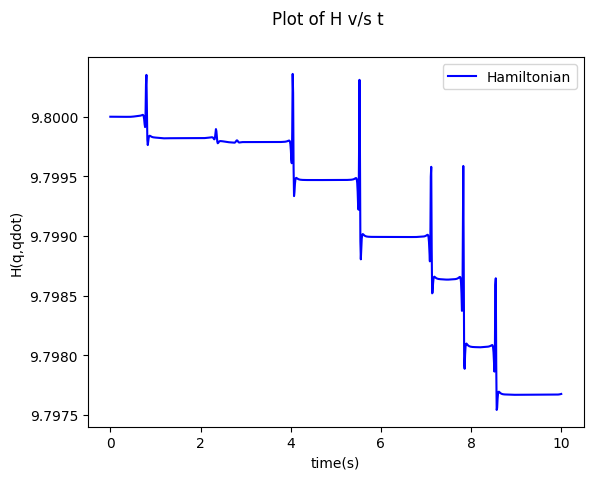

In [46]:
# storing the Lagrangian in a matrix
J_mat = sym.Matrix([L_expr])

# computing the derivative wrt q
J_mat_q = J_mat.jacobian(q)

# computing the derivative wrt qdot
J_mat_qdot = J_mat.jacobian(qdot)

# differentiating J_mat_qdot wrt t
J_mat_qdot_t = J_mat_qdot.diff(t)

# combining the terms of E-L equation
print("\n\033[1mEuler Lagrange equation for the system")
EL_expr = J_mat_q - J_mat_qdot_t
display(EL_expr.T)

rhs = sym.Matrix([0, 0])
# defining the equation
EL_eqn = sym.Eq(EL_expr.T, rhs)
soln = sym.solve(EL_eqn, qddot, dict= True)
# printing the expressions for accelerations
for sol in soln:
  pass
  # print("\n\033[1mAccelerations: ")
  for v in qddot:
    pass
#     # display(sym.Eq(v, sol[v]))

# lambdifying and finding the expressions
theta1_val = sym.lambdify([m1, m2, R1, R2, g, th1, th2, qdot[0], qdot[1]], sol[qddot[0]])
theta2_val = sym.lambdify([m1, m2, R1, R2, g, th1, th2, qdot[0], qdot[1]], sol[qddot[1]])

def ddot(q):
  """
  Returns the ddot value of the system variables at given dot values
  """
  th1_ddot = theta1_val(1,1,1,1,9.8,q[0],q[1],q[2],q[3])
  th2_ddot = theta2_val(1,1,1,1,9.8,q[0],q[1],q[2],q[3])
  return th1_ddot, th2_ddot
def dyn(q):
  """
  Return the derivative of the system state vector
  Parameter:
  f = [th1, th2, th1dot, th2dot]
  Returns:
  fdot = [th1dot, th2dot, th1ddot, th2ddot]
  """
  return np.array([q[2],q[3], ddot(q)[0],ddot(q)[1]])


# Extending the state vector of the system
f = np.array([q[0],q[1],qdot[0],qdot[1]])
# Defining initial state of the system
s0 = np.array([-np.pi/2, -np.pi/2, 0, 0])
traj = simulate(dyn, s0, [0,10], 0.01, integrate)
# print("\033[1mShape of trajectory: \033[0m", traj.shape)

H_values = []

def calculate_H(i):
  H_expr = H[0]
  current_H = H_expr.subs({m1:1, m2:1, R1:1, R2:1, g:9.8, f[0]:traj[0,i], f[1]:traj[1,i], f[2]:traj[2,i], f[3]:traj[3,i]})
  H_values.append(current_H)

for i in range(1000):
  calculate_H(i)


timespan = np.linspace(0,10,1000)
fig,ax1 = plt.subplots(1,1)
fig.suptitle("Plot of H v/s t")
ax1.plot(timespan, H_values, 'blue', label="Hamiltonian")
ax1.set_ylabel('H(q,qdot)')
ax1.set_xlabel('time(s)')
plt.legend()
plt.show()

## Problem 6 (15pts)

In the previously provided code for simulation, the numerical integration is a forth-order Runge–Kutta integration. Now, write down your own numerical integration function using Euler's method, and use your numerical integration function to simulate the same double-pendulum system with same parameters and initial condition in Problem 4. Compute and plot the Hamiltonian from the simulated trajectory, what's the difference between two plots?

> *Hint 1: You will need to implement a new ${\tt integrate()}$ function. This function takes in three inputs: a function $f(x)$ representing the dynamics of the system state $x$ (you can consider it as $\dot{x}=f(x)$), current state $x$ (for example $x(t)$ if $t$ is the current time step), and integration step length $dt$. This function should output $x(t+dt)$, for which the analytical solution is $x(t+dt) = x(t) + \int_t^{t+dt} f(x(\tau)) d\tau$. Thus, you need to think about how to numerically evaluate this integration using Euler's method.*
>
> *Hint 2: The implemented function should have the same input-output structure as the previous one.*
>
> *Hint 3: After you implement the new integration function, you can use the same helper function ${\tt simulate()}$ for simulation. You just need to input replace the integration function name as the new one (for example, your new function can be named as ${\tt euler\_integrate()}$). Please carefully read the comments in the ${\tt simulate()}$ function. Below is the template/example of how to implement the new integration function and use it for simulation.*

---
**Turn in: Include you numerical integration function (you only need to include the code for your new integration function), and the resulting plot of Hamiltonian. Make sure you label the plot appropriately with axis labels, legend and a title.**

In [11]:
##########################################################################
# Below is an example of how to implement a new integration
# function and use it for simulation

##########################################################################
# This is the same "simulate()" function we provided
# in previous homework.
def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj

##########################################################################
# This is the same "integrate()" function we provided in previous homework.
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

##########################################################################
# This is where you implement your new integration function for this
# problem. Please make sure the new integration function has the same
# input-output structure as the old one.
def new_integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    # you can start your implementation here
    new_xt = xt + dt * f(xt)
    return new_xt

##########################################################################
# In this example, we're going to simulate a particle falling in gravity,
# and assume that we already have the equations of motion (which you have
# to use Euler-Lagrange equations to solve for in the homework, but you
# should have that in last homework)
import numpy as np

def xddot(x, xdot):
    return -9.8

def dyn(s):
    return np.array([s[1], xddot(s[0], s[1])])

# define initial condition
s0 = np.array([10, 0])

##########################################################################
# We first use the old integration function to simulate the system, please
# carefully read the comments inside the "simulate()" function
traj1 = simulate(f=dyn, x0=s0, tspan=[0,10], dt=0.01, integrate=integrate)
# note that, here I pass the function arguments explicitly using the so-called
# *keyword arguments*. It's not necessary, as long as the order of the arguments
# are correct, you don't have to explicitly write down the keyword names. When
# calling the function explicitly through keyword arguments, we have "integrate=integrate",
# the first "integrate" indicates the argument name (you can see it in function definition),
# and the second "integrate" is the name of the provided integration function.
# You can also call the function as: "traj = simulate(dyn, s0, [0,10], 0.01, integrate)",
# where "integrate" indicates the provided integration function name.

##########################################################################
# Based on the code above, once you finished your own integration function,
# which is named here as "new_integrate" (but you really can name it
# as anything you like), you can simulate the trajectory as:
traj2 = simulate(f=dyn, x0=s0, tspan=[0,10], dt=0.01, integrate=new_integrate)

# figure, (axi, axm) = plt.subplots(2,1)
# time = np.linspace(0,10,1000)
# axi.plot(time, traj1[0,:])
# axm.plot(time, traj2[0,:])
# plt.show()

# if you run this code now, of course if will not succeed, since you haven't implemented
# "new_integrate" yet.

Shape of trajectory:  (4, 1000)


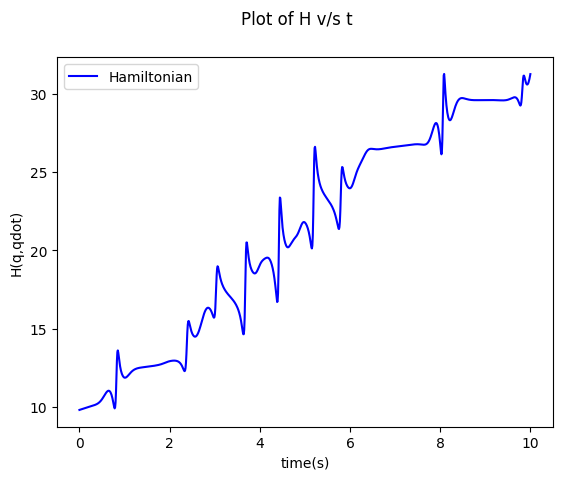

In [49]:
def ddot(q):
  """
  Returns the ddot value of the system variables at given dot values
  """
  th1_ddot = theta1_val(1,1,1,1,9.8,q[0],q[1],q[2],q[3])
  th2_ddot = theta2_val(1,1,1,1,9.8,q[0],q[1],q[2],q[3])
  return th1_ddot, th2_ddot
def dyn(q):
  """
  Return the derivative of the system state vector
  Parameter:
  f = [th1, th2, th1dot, th2dot]
  Returns:
  fdot = [th1dot, th2dot, th1ddot, th2ddot]
  """
  return np.array([q[2],q[3], ddot(q)[0],ddot(q)[1]])


# Extending the state vector of the system
f = np.array([q[0],q[1],qdot[0],qdot[1]])
# Defining initial state of the system
s0 = np.array([-np.pi/2, -np.pi/2, 0, 0])
traj = simulate(dyn, s0, [0,10], 0.01, new_integrate)
print("\033[1mShape of trajectory: \033[0m", traj.shape)

H_values = []

def calculate_H(i):
  H_expr = H[0]
  current_H = H_expr.subs({m1:1, m2:1, R1:1, R2:1, g:9.8, q[0]:traj[0,i], q[1]:traj[1,i], qdot[0]:traj[2,i], qdot[1]:traj[3,i]})
  H_values.append(current_H)

for i in range(1000):
  calculate_H(i)


timespan = np.linspace(0,10,1000)
fig,ax1 = plt.subplots(1,1)
fig.suptitle("Plot of H v/s t")
ax1.plot(timespan, H_values, 'blue', label="Hamiltonian")
ax1.set_ylabel('H(q,qdot)')
ax1.set_xlabel('time(s)')
plt.legend()
plt.show()




## Problem 7 (20pts)

For the same double-pendulum you simulated in Problem 4 with same parameters and initial condition, now add a constraint to the system such that the distance between the second pendulum and the origin is fixed at $\sqrt{2}$. Simulate the system with same parameters and initial condition, and animate the system with the same animate function provided in Homework 2.

> *Hint 1: What do you think the equations of motion should look like? Think about how the system will behave after adding the constraint. With no double, you can solve this problem using $\phi$ and all the following results for constrained Euler-Lagrange equations, however, if you really understand this constrained system, things might be much easier, and you can actually treat it as an unconstrained system.*

---
**Turn in: Include the code used to numerically evaluate, simulate and animate the system. Also, upload the video of animation separately through Canvas in ".mp4" format. You can use screen capture or record the screen directly with your phone.**

Explanation:
Since the distance has to be fixed at $\sqrt{2}$ from the origin, this means that the system must either remain fully extended or both the masses should be orthogonal at the initial condition. This leads us to the assumption that the value of $\theta_2$ should remain constant for the system, meaning the velocity and acceleration of $\theta_2$ should remain zero. With this idea, we model the system as an unconstrained system.

In [53]:
t, g, m1, m2, R1, R2 = sym.symbols(r't, g, m_1, m_2, R_1, R_2')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
q = sym.Matrix([th1, th2])
qdot = q.diff(t)
qddot = qdot.diff(t)

# Kinetic energy of mass m1
KE_m1 = 0.5*m1*R1**2*qdot[0]**2

# Potential energy of mass m1
PE_m1 = -1 * m1*g*R1*sym.cos(q[0])

# Kinetic energy of mass m2
KE_m2 = 0.5*4*m2*((R1+R2)*qdot[0])**2

# Potential energy of mass m2
PE_m2 = -1 * m2*g*((R1+R2)*sym.cos(q[0]))

# Expression for Lagrangian of the system
print("\033[1mLagrangian of the system is given by: ")
L_expr = KE_m1 + KE_m2 - (PE_m1 + PE_m2)
display(L_expr)

# storing the Lagrangian in a matrix
J_mat = sym.Matrix([L_expr])

# computing the derivative wrt q
J_mat_q = J_mat.jacobian(q)

# computing the derivative wrt qdot
J_mat_qdot = J_mat.jacobian(qdot)

# differentiating J_mat_qdot wrt t
J_mat_qdot_t = J_mat_qdot.diff(t)

# combining the terms of E-L equation
print("\n\033[1mEuler Lagrange equation for the system")
EL_expr = J_mat_q - J_mat_qdot_t
display(EL_expr.T)
EL_expr[1] = qddot[1]

# defining the rhs of the equation
rhs = sym.Matrix([0, 0])
# defining the equation
EL_eqn = sym.Eq(EL_expr.T, rhs)
soln = sym.solve(EL_eqn, qddot, dict= True)

# printing the expressions for accelerations
for sol in soln:
  print("\n\033[1mAcceleration: ")
  for v in qddot:
    display(sym.Eq(v, sol[v]))

# lambdifying and finding the expression
theta1_val = sym.lambdify([m1, m2, R1, R2, g, th1, qdot[0]], sol[qddot[0]])

def ddot(q):
  """
  Returns the ddot value of the system variables at given dot values
  """
  th1_ddot = theta1_val(1,1,1,1,9.8,q[0],q[1])
  th2_ddot = 0.0
  return th1_ddot, th2_ddot
def dyn(q):
  """
  Return the derivative of the system state vector
  Parameter:
  f = [th1,th2, th1dot, th2dot]
  Returns:
  fdot = [th1dot, th2dot, th1ddot, th2ddot]
  """
  return np.array([q[2], q[3], ddot(q)[0],ddot(q)[1]])


# Extending the state vector of the system
f = np.array([q[0],q[1],qdot[0],qdot[1]])
# Defining initial state of the system
s0 = np.array([-np.pi/2, -np.pi/2, 0, 0])
traj = simulate(dyn, s0, [0,10], 0.01, integrate)
print("\033[1mShape of trajectory: \033[0m", traj.shape)
# timespan = np.linspace(0,10,1000)
# fig,ax1 = plt.subplots(1,1)
# fig.suptitle("Trajectory of th1")
# ax1.plot(timespan, traj[0,:], 'blue')
# ax1.set_ylabel('th1(t)')
# ax1.set_xlabel('time(s)')
# plt.show()

sim_traj = np.array([traj[0,:], traj[1,:]])
# animate_double_pend(sim_traj,L1 = 1,L2 = 1,T = 5)

Lagrangian of the system is given by: 


                           2                                                                       ↪
      2    ⎛d             ⎞                                                                        ↪
0.5⋅R₁ ⋅m₁⋅⎜──(\theta₁(t))⎟  + R₁⋅g⋅m₁⋅cos(\theta₁(t)) + g⋅m₂⋅(R₁ + R₂)⋅cos(\theta₁(t)) + 2.0⋅m₂⋅( ↪
           ⎝dt            ⎠                                                                        ↪

↪                           2
↪         2 ⎛d             ⎞ 
↪ R₁ + R₂) ⋅⎜──(\theta₁(t))⎟ 
↪           ⎝dt            ⎠ 


Euler Lagrange equation for the system


⎡              2                                                                                   ↪
⎢        2    d                                                                                    ↪
⎢- 1.0⋅R₁ ⋅m₁⋅───(\theta₁(t)) - R₁⋅g⋅m₁⋅sin(\theta₁(t)) - g⋅m₂⋅(R₁ + R₂)⋅sin(\theta₁(t)) - 4.0⋅m₂⋅ ↪
⎢               2                                                                                  ↪
⎢             dt                                                                                   ↪
⎢                                                                                                  ↪
⎣                                                             0                                    ↪

↪             2             ⎤
↪          2 d              ⎥
↪ (R₁ + R₂) ⋅───(\theta₁(t))⎥
↪              2            ⎥
↪            dt             ⎥
↪                           ⎥
↪                           ⎦


Acceleration: 


 2                                                                                            
d                 -R₁⋅g⋅m₁⋅sin(\theta₁(t)) - R₁⋅g⋅m₂⋅sin(\theta₁(t)) - R₂⋅g⋅m₂⋅sin(\theta₁(t))
───(\theta₁(t)) = ────────────────────────────────────────────────────────────────────────────
  2                               2            2                           2                  
dt                              R₁ ⋅m₁ + 4.0⋅R₁ ⋅m₂ + 8.0⋅R₁⋅R₂⋅m₂ + 4.0⋅R₂ ⋅m₂               

 2                   
d                    
───(\theta₂(t)) = 0.0
  2                  
dt                   

Shape of trajectory:  (4, 1000)


## Problem 8 (5pts)

For the same system with same constraint in Problem 6, simulate the system with initial condition $\theta_1=\theta_2=-\frac{\pi}{4}$, which actually violates the constraint! Simulate the system and see what happen, what do you think is the actual influence after adding this constraint?

---
**Turn in: Your thoughts about the actual effect of the constraint in this system. Note that you don't need to include any code for this problem.**

Explanation: The actual influence of this constraint is restricting any change in the value, meaning the value of $\theta_2$ is a constant. This means that the derivative of $\theta_2$ is zero. So, there is no deviation from the initial condition, for the second pendulum. In Problem 7, it remains at $-\pi/2$ relative to pendulum 1 and in Problem 8, it remains at $-\pi/4$ relative to pendulum 2 during the entire simulation.

In [54]:
# Extending the state vector of the system
f = np.array([q[0],q[1],qdot[0],qdot[1]])
# Defining initial state of the system
s0 = np.array([-np.pi/4, -np.pi/4, 0, 0])
traj = simulate(dyn, s0, [0,10], 0.01, integrate)
print("\033[1mShape of trajectory: \033[0m", traj.shape)

sim_traj = np.array([traj[0,:], traj[1,:]])
# animate_double_pend(sim_traj,L1 = 1,L2 = 1,T = 5)

Shape of trajectory:  (4, 1000)
